# Rear Tire Cornering Analysis
## R25B 18.0 x 7.5-10 on 7" Rim
### Comparing Different Influences on Tire Load Outputs

In [32]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import copy

import sys
sys.path.append("../")
import data_helpers

### Import tire data & Show distribution of samples on variable sweeps

In [33]:
df = data_helpers.import_data(sio.loadmat("../tire_data/processed_data/cornering_2021_rears.mat"))

print(df)

variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    count = df.groupby([variable])[variable].count()
    variable_sweeps[variable]["count"] = count
    print(count, "\n")

              ET      V       N     SA     IA      RL      RE      P      FX  \
0        267.600  40.34  479.89  0.052 -0.031  21.646  22.301  83.33 -41.533   
1        267.610  40.35  479.89  0.091 -0.034  21.651  22.309  83.38 -52.351   
2        267.620  40.36  479.68  0.122 -0.037  21.646  22.321  83.28 -63.607   
3        267.630  40.36  479.54  0.161 -0.027  21.646  22.329  83.28 -74.460   
4        267.640  40.36  479.34  0.204 -0.039  21.651  22.339  82.93 -84.790   
...          ...    ...     ...    ...    ...     ...     ...    ...     ...   
115055  1500.222  72.47  851.47 -0.172 -0.027  22.319  22.581  83.74 -52.762   
115056  1500.232  72.46  851.68 -0.126 -0.034  22.328  22.572  83.49 -49.654   
115057  1500.242  72.46  851.74 -0.091 -0.037  22.329  22.572  83.54 -44.834   
115058  1500.252  72.46  851.74 -0.053 -0.039  22.328  22.572  83.28 -37.474   
115059  1500.262  72.46  851.54 -0.012 -0.033  22.320  22.576  83.28 -28.969   

             FY       FZ    MX    MZ   

### Comparing lateral force and self aligning moment against slip angle for different pressures. Holds camber, velocity, and load constant by choosing most commonly used value.

In [34]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "pressure":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


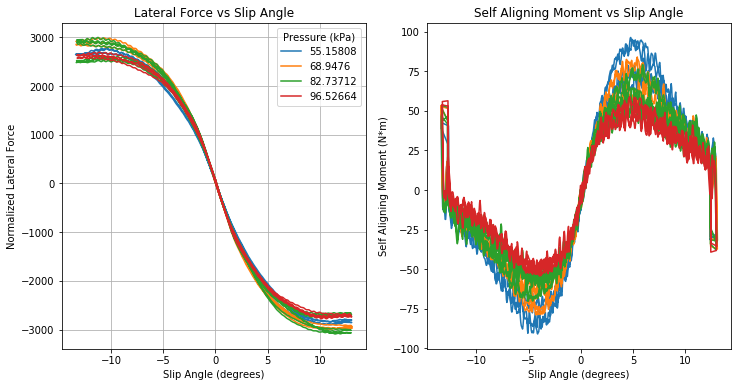

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["pressure"]["sweep"], title = "Pressure (kPa)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, it is clear the 82.74 kPa (12 psi) pressure is optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different cambers. Holds pressure, velocity, and load constant by choosing most commonly used value.

In [36]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "camber":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


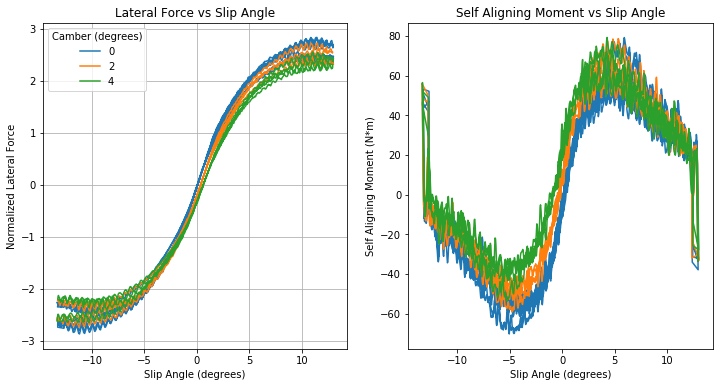

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["camber"]["sweep"], title = "Camber (degrees)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, the closer the camber is to zero, the more optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different velocities. Holds pressure, camber, and load constant by choosing most commonly used value.

In [38]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "velocity":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kieran\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


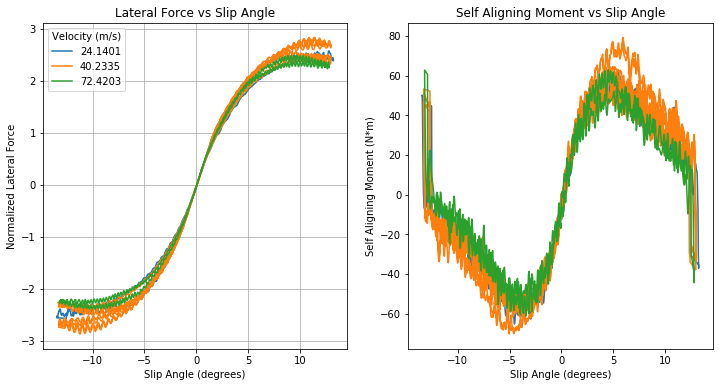

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["velocity"]["sweep"], title = "Velocity (m/s)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

In [40]:
pd.set_option('display.max_columns', None)
for i, g in temp_df.groupby(["velocity"]):
    h = g[(g["SA"] > 9.98) & (g["SA"] <= 10)]
    print(h.head(), "\n")   

              ET      V       N     SA     IA      RL      RE      P      FX  \
106358  1300.037  24.23  284.93  9.984 -0.033  21.148  22.195  83.59 -13.558   
106497  1301.427  24.25  287.25  9.987 -0.022  21.075  22.093  83.08  -1.913   

              FY        FZ     MX     MZ   NFX   NFY    RST   TSTI   TSTC  \
106358 -2712.514 -1112.389  41.69  25.06  0.02  2.43  32.50  48.49  49.32   
106497 -2709.474 -1116.319  40.74  30.69  0.00  2.45  32.73  53.39  55.43   

         TSTO  AMBTMP     SR   SL  RUN         load  camber  pressure  \
106358  46.29   28.58 -0.047 -0.0   22 -1112.055122       0  82.73712   
106497  46.23   28.59 -0.046 -0.0   22 -1112.055122       0  82.73712   

        velocity  
106358   24.1401  
106497   24.1401   

            ET      V       N     SA     IA      RL      RE      P      FX  \
245    270.050  40.30  475.17  9.982 -0.034  21.252  22.144  83.64 -11.644   
5358   387.050  40.30  475.51  9.999 -0.033  21.236  22.127  84.19  -8.968   
5494   388.410